![plants_python_logo.jpg](../../images/plants_python_logo.jpg)

# 9.0 Genome visualization and comparative genomics

Now that we've assembled a reference genome, we need to parse out the biologically meaningful sequences. These include genes, small RNAs, regulatory elements (i.e. promoters, enhancers, conserved non-coding sequences), repetitive elements, and structural repeats (e.g. centromere satelites, telomeres). **Annotation** refers to the identification of these biologically relevent sequences. Genomes are generally poorly annotated, and we have still haven't correctly identified all of the genes and important sequences in even the most heavily researched species like humans, fruit flies, and Arabidopsis. Genome annotations are constantly changing, and the addition and subtraction of genes between genomes is HUGELY frustrating. We could spend a whole course on genome annotation, but this is probably beyond the interest of everyone in class! <br>
The most widely tool to run genome annotation is the MAKER pipeline. If you are interested in MAKER, Kevin Childs (in Plant Biology at MSU) is one of the developers and they put together a nice tutorial for running MAKER on HPCC: 
http://bioinformatics.plantbiology.msu.edu/display/BIOIN/MAKER
<br>
Repetitive elements vary wildly between species but genes tend to be pretty highly conserved in both content and order along chromosomes. Still, new genes arise all the time via gene or genome duplication and differences in gene content usually drive the evolution of new traits between species. In this notebook, we will explore the evolution of genome architecture across species. We will also introduce the concept of phlylogenetics and compare gene content differences across diverse plant lineages. 

## Plant biology learning objectives

- Undestand what makes up the genome and how genomes vary between plant species
- Introduce the file formats used to denote features in the genome
- Understand foundational principles of comparative genomics including synteny and orthology-based approaches


## 9.1 Introduction to Comparative Genomics
The following video provides a broad introduction to genome visualization and comparative genomics. 

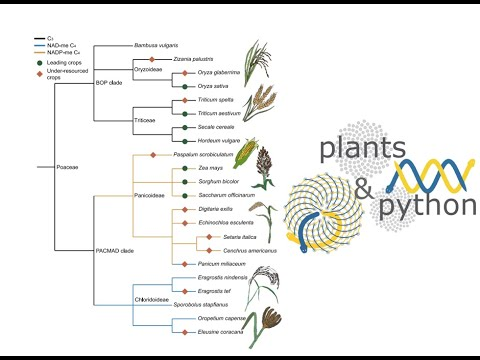

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("xwP7PW-MuUQ",width=960,height=540)

___

   # 9.2 Visualizing and formatting genome features

A genome is simply a combination of A T C and Gs. You can technically open up a genome fasta file in a text editor or terminal, but humans are generally unable to identify meaningful sequences by eye alone. We can utilize genome browsers to move around the genome and view various 'tracks' of biological features (genes, repeats, variants, etc.). Genome annotation features can be stored in various tab or comma delineated formats but there are two you are likely to encounter (gff3 and BED). If you are unlikely to encounter these in your research, please feel free to skip ahead! 

The **BED** format consists of one line per feature, each containing 3-12 columns of data, plus optional track definition lines.
<br>
The first three fields in each feature line are required:
<br>
1. `chrom` - name of the chromosome or scaffold. Any valid seq_region_name can be used, and chromosome names can be given with or without the 'chr' prefix.
2. `chromStart` - Start position of the feature in standard chromosomal coordinates (i.e. first base is 0).
3. `chromEnd` - End position of the feature in standard chromosomal coordinates
<br>
Here is an example of the simples bed file:

         chr1  213941196  213942363
         chr1  213942363  213943530
         chr1  213943530  213944697
         chr2  158364697  158365864
         chr2  158365864  158367031
         chr3  127477031  127478198
         chr3  127478198  127479365
         chr3  127479365  127480532
         chr3  127480532  127481699


The **GFF** (General Feature Format) format consists of one line per feature, each containing 9 columns of data, plus optional track definition lines. 
<br>
Nine fields are required for each feature:
1. `seqid` - name of the chromosome or scaffold; chromosome names can be given with or without the 'chr' prefix. Important note: the seq ID must be one used within Ensembl, i.e. a standard chromosome name or an Ensembl identifier such as a scaffold ID, without any additional content such as species or assembly. See the example GFF output below.
2. `source` - name of the program that generated this feature, or the data source (database or project name)
3. `type` - type of feature. Must be a term or accession from the SOFA sequence ontology
4. `start` - Start position of the feature, with sequence numbering starting at 1.
5. `end` - End position of the feature, with sequence numbering starting at 1.
6. `score` - A floating point value.
7. `strand` - defined as + (forward) or - (reverse).
9. `phase` - One of '0', '1' or '2'. '0' indicates that the first base of the feature is the first base of a codon, '1' that the second base is the first base of a codon, and so on..
9. `attributes` - A semicolon-separated list of tag-value pairs, providing additional information about each feature. Some of these tags are predefined, e.g. ID, Name, Alias, Parent - see the GFF documentation for more details.

Here is an example of a gff file:

        ##gff-version 3
        ctg123 . mRNA            1300  9000  .  +  .  ID=mrna0001;Name=sonichedgehog
        ctg123 . exon            1300  1500  .  +  .  ID=exon00001;Parent=mrna0001
        ctg123 . exon            1050  1500  .  +  .  ID=exon00002;Parent=mrna0001
        ctg123 . exon            3000  3902  .  +  .  ID=exon00003;Parent=mrna0001
        ctg123 . exon            5000  5500  .  +  .  ID=exon00004;Parent=mrna0001
        ctg123 . exon            7000  9000  .  +  .  ID=exon00005;Parent=mrna0001



A genome browser is a useful way to scroll through biologically meaningful regions within a genome. There are many examples with nice GUIs, but here is one from maize: 
<br>
https://www.maizegdb.org/gbrowse/maize_v4
<br>
Notice, how many layers can be stacked together!

___

# 9.3 Comparative Genomics

Plant genomes are generally collinear, with similar gene content and gene order along their chromosomes, and most conserved genes have the same function across species. We can use this property to infer the function of a new gene from a non-model species based on molecular and genetic characterization of that same gene in a model species. We can also compare two genomes and identify differences between them that might be driving unique or important traits such as stress tolerance, disease resistance, yield, taste, and metabolite biosynthesis (among many others). Some genes can have hundreds of copies across the genome, and we can use their relative position to infer which genes are orthologous and have (likely) conserved function and which genes are not orthologous. **Synteny** refers to the physical co-localization of gene blocks in corresponding chromosome regions between two species. Below is an example from several grass genomes: 
<br>
![grass_genomes.jpeg](../../images/grass_genomes.jpeg)
<br> 
Here, individual genes are shown in blue and green (for forward and reverse orientation) and syntenic gene pairs (i.e. conserved genes) are connected by gray lines. Notice how most genes in the grass genomes are conserved, but each species has its own unique genes not shared by others. Some of these species-specific genes are real, but others are probably not. Again, biology is inherently sloppy, and we have trouble figuring out which genes are real and which aren't. Some sequences _look like genes_ but aren't and others look like random garbage but are actually functional. Also, dead genes can come back to life. Also, also, 'real' is relative here. 
<br>
We can identify syntenic orthologs by aligning the genes from one species to another using BLAST or lastal, and filtering the output to only genes that are found in similarly ordered blocks along a chromosome. My favorite tool to do these analyses is MCscan:
https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)
<br>

<br>
We can run MCscanx using a binderized version in Juypter: <br>
https://hub.gke2.mybinder.org/user/fomightez-mcscan-binder-5pjfwci4/notebooks/index.ipynb <br>

The python version of MCscan is tricky to run on HPCC (because of dependencies and compatability issues), but we can implement the MCscan algorithm in CoGe: 
<br>
https://genomevolution.org/coge/SynMap.pl
<br>
Here, we can compare any two genomes and identify macro and microsyntenic differences. Genomes that are closer together phylogenetically typically produce better results, but you can compare the genomes of any two plant species and get reasonably good synteny patterns! Good examples would include sorghum vs maize (_Sorghum bicolor_ id331 vs _Zea mays_ id333), strawberry vs raspberry (_Fragaria vesca_ id34820 vs _Rubus occidentalis_ id39823), and broccoli vs cabbage (_Brassica oleracea_ id39933 vs _Brassica rapa_ id40947). You could also get a little crazy and compare pineapple vs Asparagus, orange vs bamboo, or pepper vs rice. You can also compare two different versions of the same genome to look for differences/improvements. It's best to compare well assembled, chromosome scale genomes to get better results. Genomes with ~10,000 contigs are heavily fragmented and not pretty to look at. 
![synmap.png](../../images/synmap.png)
<br>
After you've chosen your species, hit Generate `SynMap`
<br>
You can scroll around the syntenic dotplot and zoom in on certain regions of interest. Once you've found a region of interest, you can compare gene level differences like so: 
![synmap_zoom.jpeg](../../images/synmap_zoom.jpeg)
Here, conserved sequences between species are shown by red connections. 

### Which two species did you decide to compare? How similar are their genomes? 

In [2]:
##Answer
##
##